# Learn how to use Numpy and Matplotlib

Instructions:
1. read the notebook by paying attention to the cells with text: it will help you to go through the notebook.
2. each time you see `????????` in a coding cell, it means that you have to write some code there…
3. the symbol 💡 indicates an hint.

First of all, import `numpy` as `np` and `matplotlib.pyplot` as `plt`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Let's read the file

Look at how the file `data.csv` is organized. The begining of the file looks like that:
```
# Measures of the expression of two proteins in single cells
# Cell width (µm), Cell length (µm), expr1 (a.u.), expr2 (a.u.) 
1.01717618856, 1.18601687991, 1.94442957479, 6.45230383058
0.962300371113, 1.39398670797, 1.24288760968, 4.71908470631
1.3143512793, 1.25345422009, 2.0175894817, 6.44305045533
1.14691028489, 1.18110397875, 1.17994268307, 5.75662593772
1.19239102022, 1.02956849917, 1.23511002063, 5.18843294689
1.10325297265, 1.30736764133, 1.88068031014, 6.05027191699
1.08849866487, 1.04698401408, 1.94835875667, 7.02552186266
0.945979587233, 1.61471625098, 1.47584029888, 6.64267472427
1.09544884707, 1.70457845063, 0.948567734053, 3.79989089629
…
```

* first you have an header that start whith the character `#` and that gives you information about how the file is organized
* then you have plenty of lines of floats where values are separated by a comma `,`


We want to read this file and store its information into three arrays:
* the array `width` that will represent the first column of the file
* the array `length` that will represent the first column of the file
* the array `expr1` that will represent the second column of the file 
* the array `expr2` that will represent the third column of the file 
  
PROBLEM: to create an Numpy array, you need to already know its length. An easy solution to that is to at first create temporary lists (`width_list`,`length_list`,`expr1_list`,`expr2_list`) that we will fill with the `list.append(new_element)` method.

Go through each of the lines of the file, if it is an line with data in it, fill the different lists with their corresponding value (💡 look at how we read the fastq file; 💡 use the `string.split(motif)` method to split the line).

In [4]:
width_list = []
length_list = []
expr1_list = []
expr2_list = []

with open('data.csv','r') as file:
    for line in file:
        if not line.startswith('#'):
            line_list = line.split(',')
            width_list.append(float(line_list[0]))
            length_list.append(float(line_list[1]))
            expr1_list.append(float(line_list[2]))
            expr2_list.append(float(line_list[3]))

    
    
width = np.array(width_list)
length = np.array(length_list)
expr1 = np.array(expr1_list)
expr2 = np.array(expr2_list)

Print the sample size (💡 think about Numpy's attributes):

In [6]:
print("The sample size is %i." %width.size)

The sample size is 500.


## Volume reconstruction
A first approximation is to consider the volume of the cells as a cylinder. As a reminder the formula of the cylinder is given by 

$$V = L \pi R^2$$

where $V$ is the volume of the cylinder, $L$ its length and $R$ the radius of the base.


Create a `volume` array using this formula  (💡 is the constant $\pi$ direclty available in Numpy? ; ⚠ `width` is a  diameter). 

In [8]:
volume = length*np.pi *(width/2)**2

Let's now plot `expr1` as a function of `volume` using `plt.plot(volume,expr1)`

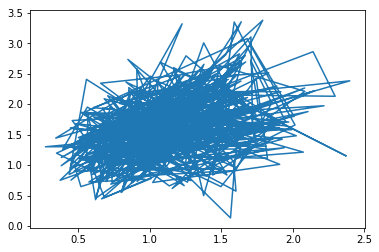

In [9]:
plt.plot(volume,expr1)
plt.show()

Ugly, isn't it? We are drawing lines between the couples of point `(volume[i],expr1[i])` and `(volume[i+1],expr1[i+1])` when the array `volume` is not even sorted. You are just drawing lines back and forth…

We would be better plot dots rather then lines.


Plot `expr1` as a function of `volume` with dots intead of lines (💡 you can adapt the example of [this example](https://matplotlib.org/gallery/pyplots/pyplot_formatstr.html#sphx-glr-gallery-pyplots-pyplot-formatstr-py) of Matplotlib's gallery).



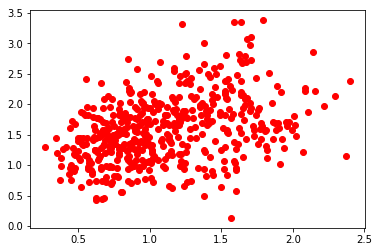

In [10]:
plt.plot(volume,expr1,'ro')
plt.show()

Based on the code you have just written, and by looking at the example of the slides, try to reproduce this figure the best you can: 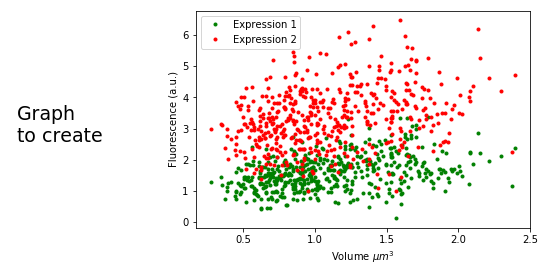

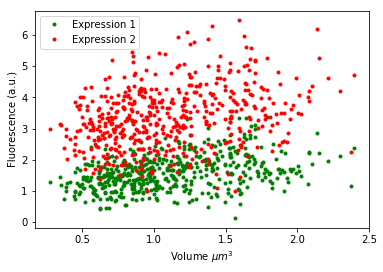

In [12]:
plt.plot(volume,expr1,'go',markersize=3,label="Expression 1")
plt.plot(volume,expr2,'ro',markersize=3,label="Expression 2")
plt.xlabel("Volume $\mu m^3$")
plt.ylabel("Fluorescence (a.u.)")


plt.legend()
plt.show()

## Normalize the protein fluorescences

There seems to have a dependance between the volume and the expression of both proteins. Let's create two arrays `expr1_norm` and `expr2_norm` that represent `expr1` and `expr2` both normalized by the `volume`. They can by interpreted as the concentration (of some sort) of both proteins inside each cells.

In [13]:
expr1_norm = expr1/volume
expr2_norm = expr2/volume

We would like to represent `expr1_norm` and `expr2_norm` with histograms. It is possible to do so with Matplotlib.

In two subsequent figures, plot the histograms of `expr1_norm` and `expr2_norm` each with 20 "bins" (that is to say 20 subdivisions).

(💡 you can have a look at the `plt.hist` [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) and at this  [example](https://matplotlib.org/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py) )

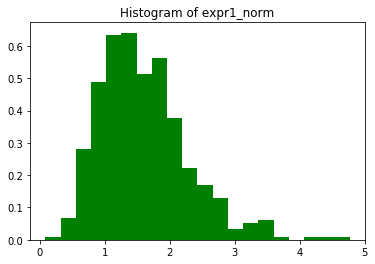

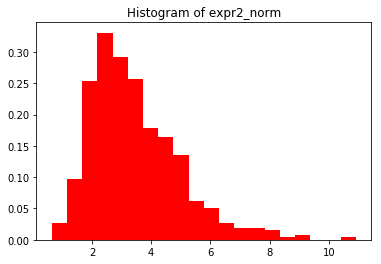

In [15]:
#### Plot the histogram of `expr1_norm`
plt.figure() # this statement ensures that a new figure is created

plt.hist(expr1_norm,facecolor='g', density=True,bins=20)

plt.title('Histogram of expr1_norm')  # you can add title to the figures
plt.show()



#### Plot the histogram of `expr2_norm`
plt.figure() # this statement ensures that a new figure is created

plt.hist(expr2_norm,facecolor='r', density=True,bins=20)

plt.title('Histogram of expr2_norm')  # you can add title to the figures
plt.show()

Print the mean and the standard deviation of both `expr1_norm` and `expr2_norm`.

In [16]:
print("The average of expr1_norm is %.2f and its standard deviation is %.2f."%(expr1_norm.mean(),expr1_norm.std()))
print("The average of expr2_norm is %.2f and its standard deviation is %.2f."%(expr2_norm.mean(),expr2_norm.std()))

The average of expr1_norm is 1.60 and its standard deviation is 0.68.
The average of expr2_norm is 3.45 and its standard deviation is 1.53.


## Correlations between `expr1_norm` and `expr2_norm`

For each cell, we have a value of the expression of the protein A and of the protein B. Is there any correlation between the two?

Let's check that: display the graph of `expr2_norm` as a function of `expr1_norm` (with dots)

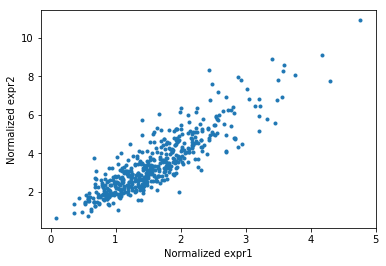

In [19]:
plt.plot(expr1_norm,expr2_norm,'o',markersize=3)

plt.xlabel('Normalized expr1')
plt.ylabel('Normalized expr2')
plt.show()

Rather than having a scatter plot, we could prefer to have a 2D histogram. Look at [this example](https://matplotlib.org/examples/pylab_examples/hist2d_demo.html) and plot the 2D histogram of `expr2` ad a function of `expr1`.

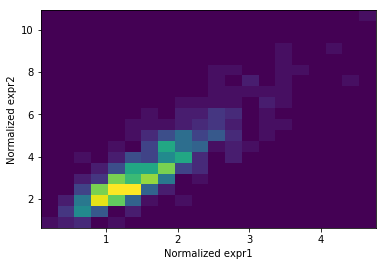

In [21]:
plt.hist2d(expr1_norm,expr2_norm,bins=20)
plt.xlabel('Normalized expr1')
plt.ylabel('Normalized expr2')
plt.show()

There seems to have a correlation between `expr1_norm` and `expr2_norm`. We can quantify this correlation using the **Pearson correlation coefficient** (see the [Wikipedia page](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ). The closer to 1, the higher is the correlation. The formula to compute the Pearson correlation coefficient between two quantities $X$ and $Y$ is given by the formula:

$$\rho = \frac{cov(X,Y)}{\sigma_X \sigma_Y} $$

where $cov(X,Y)$ represents the [covariance](https://en.wikipedia.org/wiki/Covariance) between $X$ and $Y$ and $\sigma_X$ and $\sigma_Y$ represent the standard deviation of respectivally $X$ and $Y$.

Apply this to our example to compute the Pearson correlation coefficient of `expr1_norm` and `expr2_norm`. (💡 look at this [discussion](https://stackoverflow.com/questions/15317822/calculating-covariance-with-python-and-numpy) to understand how to to compute $cov(X,Y)$ with Numpy)

In [22]:
pearson_coef = np.cov(expr1_norm,expr2_norm)[0][1]/(expr1_norm.std()*expr2_norm.std())

print("The Pearson correlation coefficient between `expr1_norm` and `expr2_norm` is %.2f."%pearson_coef)

The Pearson correlation coefficient between `expr1_norm` and `expr2_norm` is 0.88.


## Linear regressions


We want a linear regession to predict the value of `expr2_norm` based on `expr1_norm`:

$$ expr2\_norm = A\, expr1\_norm +B$$

The quantities $A$ and $B$ are unknown but they can  be fitted using the [least square method](https://en.wikipedia.org/wiki/Least_squares). 

Even if you do not know all the details of linear regression, try to adapt the example of `np.linalg.lstsq` [documentation page](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html) to plot a graph like this one
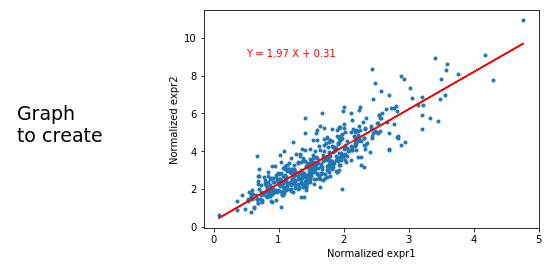

(💡 to add some text on your figure, you can have a look at [this example](https://matplotlib.org/gallery/text_labels_and_annotations/text_fontdict.html#sphx-glr-gallery-text-labels-and-annotations-text-fontdict-py))

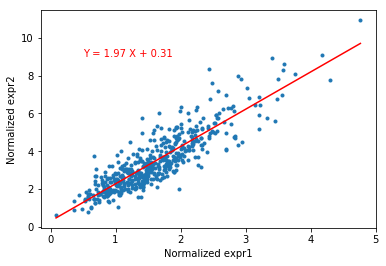

In [26]:
plt.plot(expr1_norm,expr2_norm,'o',markersize=3)


A = np.vstack([expr1_norm, np.ones(len(expr1_norm))]).T
m, c = np.linalg.lstsq(A, expr2_norm)[0]

xx = np.array([expr1_norm.min(),expr1_norm.max()])
plt.plot(xx, m*xx + c, 'r', label='Fitted line')
plt.xlabel('Normalized expr1')
plt.ylabel('Normalized expr2')
plt.text(0.5,9,'Y = %.2f X + %.2f'%(m,c),color='r')

plt.show()